# Setup

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Load data



In [3]:
%%R -o mtcars

library(tidyverse)

mtcars

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
                     mpg cyl  disp  hp drat    wt  qsec vs am gear carb
Mazda RX4           21.0   6 160.0 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag       21.0   6 160.0 110 3.90 2.875 17.02  0  1    4    4
Datsun 710          22.8   4 108.0  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive      21.4   6 258.0 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout   18.7   8 360.0 175 3.15 3.440 17.02  0  0    3    2
Valiant             18.1   6 225.0 105 2.76 

In [4]:
%%R 

# pivot mtcars from wide to long using pivot_longer on all columns except the index
mtcars_long <- mtcars %>%
    rownames_to_column(var = "model") %>% # convert rownames (index) to a regular column %>% 
    pivot_longer(cols = -c(model, mpg), names_to = "variable", values_to = "value") 

mtcars_long

# A tibble: 320 × 4
   model       mpg variable  value
   <chr>     <dbl> <chr>     <dbl>
 1 Mazda RX4    21 cyl        6   
 2 Mazda RX4    21 disp     160   
 3 Mazda RX4    21 hp       110   
 4 Mazda RX4    21 drat       3.9 
 5 Mazda RX4    21 wt         2.62
 6 Mazda RX4    21 qsec      16.5 
 7 Mazda RX4    21 vs         0   
 8 Mazda RX4    21 am         1   
 9 Mazda RX4    21 gear       4   
10 Mazda RX4    21 carb       4   
# ℹ 310 more rows
# ℹ Use `print(n = ...)` to see more rows


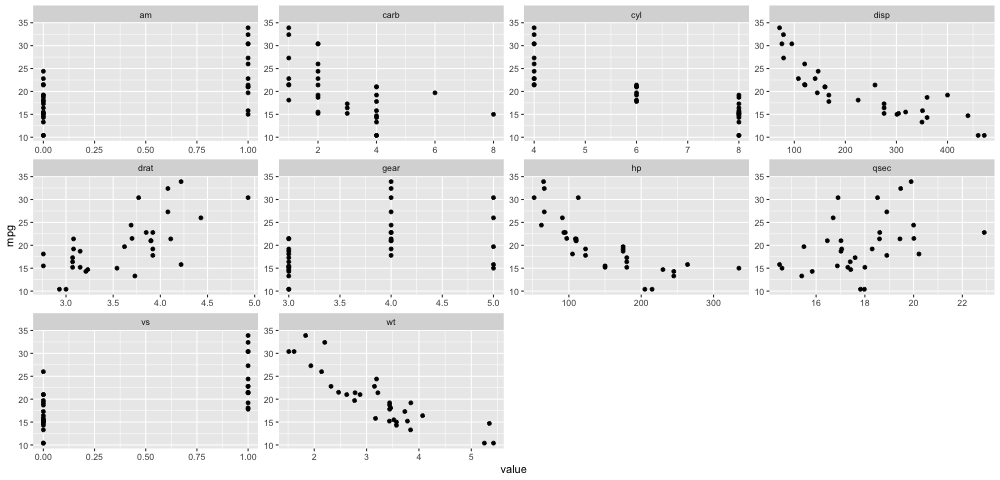

In [5]:
%%R -w 1000

ggplot(mtcars_long) +
        aes(x=value, y=mpg) +
        geom_point() + 
        # geom_smooth(method = "lm") +
        facet_wrap(~variable, scales = "free") 


# Regression model

## Linear model of `mpg~wt`


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10

`geom_smooth()` using formula = 'y ~ x'


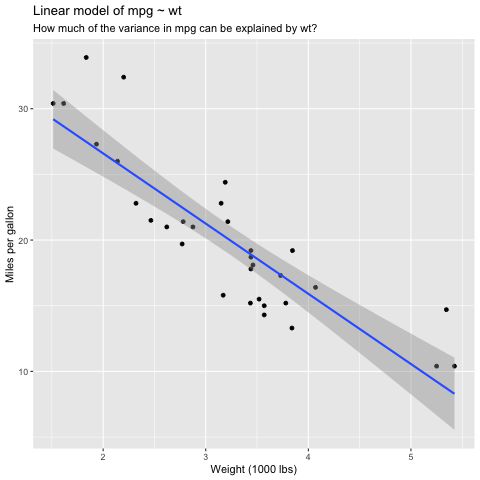

In [6]:
%%R 

# Fit a linear model
model <- lm(mpg ~ wt, data = mtcars) 

# show the summary
print(summary(model))

# Plot the model
ggplot(mtcars, aes(x=wt, y=mpg)) +
        geom_point() + 
        geom_smooth(method = "lm") + 
        labs(
                title = "Linear model of mpg ~ wt",
                subtitle = "How much of the variance in mpg can be explained by wt?",
                x = "Weight (1000 lbs)",
                y = "Miles per gallon"
        )


* 👉 interpret what the p-value means
* 👉 interpret what the R-squared value means
* 👉 draw a conclusion in words

## Linear model of `mpg~hp`

use the code from above (copy paste and just change the x variable from `wt` to `hp`)

In [ ]:
%%R 

# Fit a linear model

# show the summary

# Plot the model


* 👉 interpret what the p-value means
* 👉 interpret what the R-squared value means
* 👉 draw a conclusion in words

## Linear model of `mpg~disp`

In [ ]:
%%R 

# Fit a linear model

# show the summary

# Plot the model


* 👉 interpret what the p-value means
* 👉 interpret what the R-squared value means
* 👉 draw a conclusion in words

## Linear model of `mpg~qsec`

In [ ]:
%%R 

# Fit a linear model

# show the summary

# Plot the model


* 👉 interpret what the p-value means
* 👉 interpret what the R-squared value means
* 👉 draw a conclusion in words